In [70]:
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb

In [71]:
img = cv2.imread('./testimage/messiii.jpg')
img.shape

(1633, 736, 3)

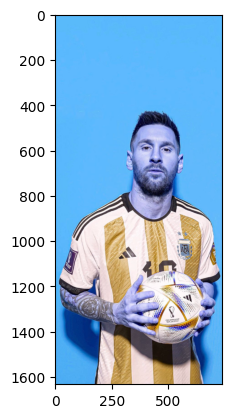

In [72]:
plt.imshow(img)

In [73]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1633, 736)

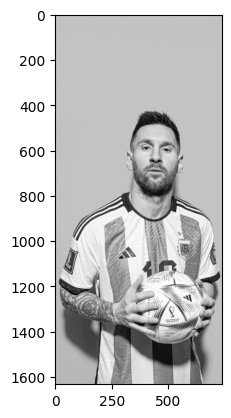

In [74]:
plt.imshow(gray, cmap='gray')

In [75]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[321, 489, 248, 248]])

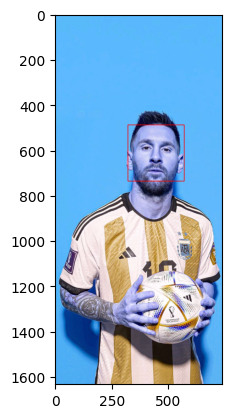

In [76]:
(x,y,w,h) = faces[0]
x,y,w,h

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

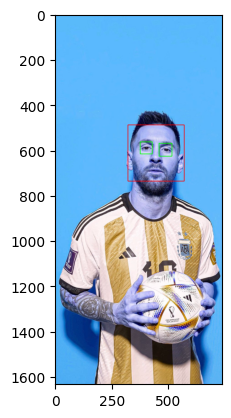

In [77]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

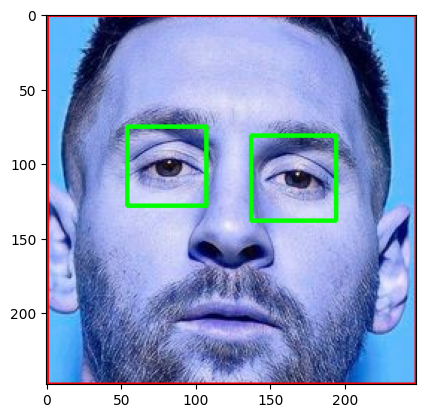

In [78]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [79]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

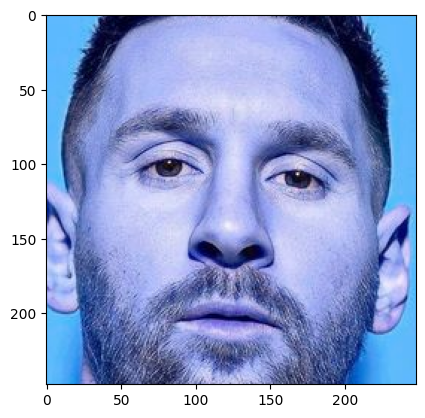

In [80]:
cropped_image = get_cropped_image_if_2_eyes('./testimage/messiii.jpg')
plt.imshow(cropped_image)

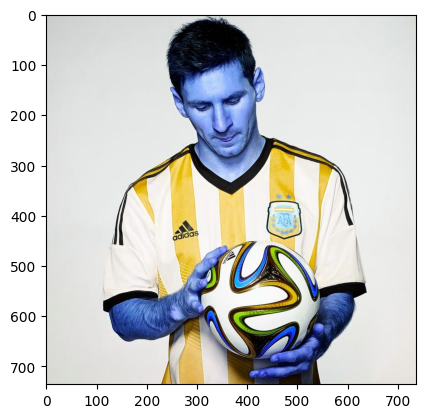

In [81]:
org_image_obstructed = cv2.imread('./testimage/messi2.jpg')
plt.imshow(org_image_obstructed)

In [82]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./testimage/messi2.jpg')
cropped_image_no_2_eyes
#Nothing

In [83]:
path_to_data = "./Dataset/"
path_to_cr_data = "./Dataset/cropped/"


import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [84]:
img_dirs

['./Dataset/cropped',
 './Dataset/elon musk',
 './Dataset/lionel messi',
 './Dataset/oprah winfrey',
 './Dataset/warren buffett']

In [85]:
import shutil    # This code will create the folder
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [86]:
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

cropped
elon musk
lionel messi
oprah winfrey
warren buffett


In [87]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

cropped
elon musk
Generating cropped images in folder:  ./Dataset/cropped/elon musk
lionel messi
Generating cropped images in folder:  ./Dataset/cropped/lionel messi
oprah winfrey
Generating cropped images in folder:  ./Dataset/cropped/oprah winfrey
warren buffett
Generating cropped images in folder:  ./Dataset/cropped/warren buffett


In [88]:
cropped_img = np.array(roi_color)
cropped_img.shape

(706, 706, 3)

In [89]:

import pywt   

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

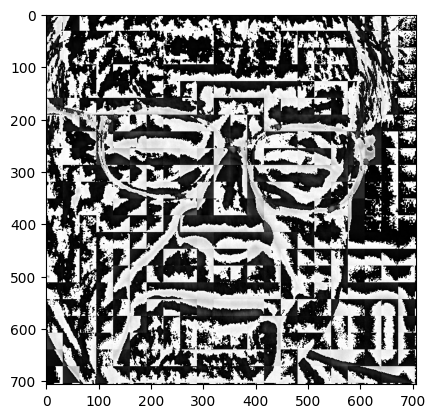

In [90]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [91]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'elon musk': ['./Dataset/cropped/elon musk\\elon musk1.png',
  './Dataset/cropped/elon musk\\elon musk10.png',
  './Dataset/cropped/elon musk\\elon musk11.png',
  './Dataset/cropped/elon musk\\elon musk12.png',
  './Dataset/cropped/elon musk\\elon musk13.png',
  './Dataset/cropped/elon musk\\elon musk14.png',
  './Dataset/cropped/elon musk\\elon musk15.png',
  './Dataset/cropped/elon musk\\elon musk16.png',
  './Dataset/cropped/elon musk\\elon musk17.png',
  './Dataset/cropped/elon musk\\elon musk18.png',
  './Dataset/cropped/elon musk\\elon musk19.png',
  './Dataset/cropped/elon musk\\elon musk2.png',
  './Dataset/cropped/elon musk\\elon musk20.png',
  './Dataset/cropped/elon musk\\elon musk21.png',
  './Dataset/cropped/elon musk\\elon musk22.png',
  './Dataset/cropped/elon musk\\elon musk23.png',
  './Dataset/cropped/elon musk\\elon musk24.png',
  './Dataset/cropped/elon musk\\elon musk25.png',
  './Dataset/cropped/elon musk\\elon musk26.png',
  './Dataset/cropped/elon musk\\elon mu

In [92]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'elon musk': 0, 'lionel messi': 1, 'oprah winfrey': 2, 'warren buffett': 3}

In [93]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [94]:
len(X[0])

4096

In [95]:
X[0]

array([[157],
       [144],
       [142],
       ...,
       [253],
       [ 32],
       [240]], dtype=uint8)

In [96]:
y[0]

0

In [97]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(164, 4096)

In [98]:
# Model Training
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7804878048780488

In [100]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.93      0.79        14
           1       0.86      0.75      0.80         8
           2       0.87      0.81      0.84        16
           3       0.00      0.00      0.00         3

    accuracy                           0.78        41
   macro avg       0.60      0.62      0.61        41
weighted avg       0.74      0.78      0.75        41



C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [101]:
len(X_test)

41

In [102]:
# GridSearch

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [103]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.821000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.706667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.811667,{'logisticregression__C': 1}


In [104]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [105]:
best_estimators['svm'].score(X_test,y_test)

0.9024390243902439

In [106]:
best_estimators['random_forest'].score(X_test,y_test)

0.6829268292682927

In [107]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8292682926829268

In [108]:
best_clf = best_estimators['svm']

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[14,  0,  0,  0],
       [ 0,  7,  1,  0],
       [ 0,  1, 15,  0],
       [ 1,  1,  0,  1]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

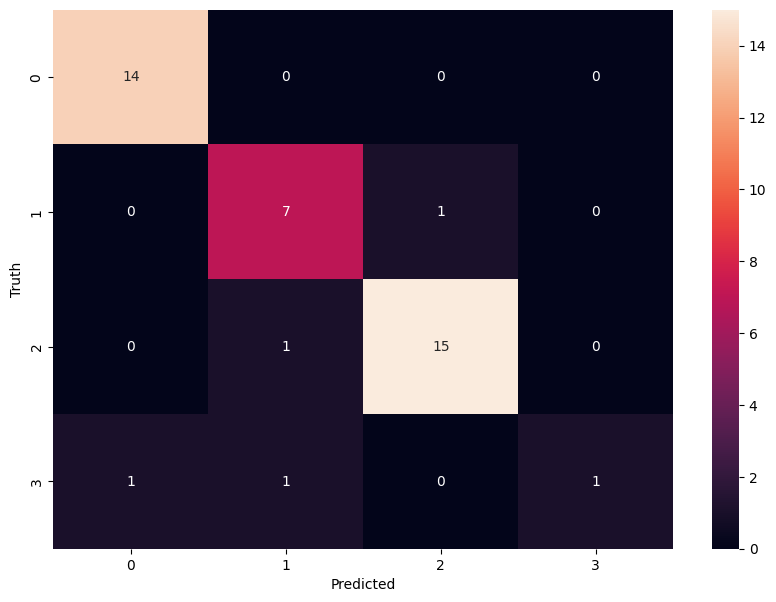

In [110]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [111]:
class_dict

{'elon musk': 0, 'lionel messi': 1, 'oprah winfrey': 2, 'warren buffett': 3}

In [112]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']